In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#load data
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train.shape

(1460, 81)

In [4]:
#look all the available variables, 80 of them in total
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
#type of data in each column
df_train.columns.groupby(df_train.dtypes)

{dtype('int64'): Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object'),
 dtype('O'): Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 

In [6]:
#counts by data type
df_train.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

In [7]:
#examine the response variable
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

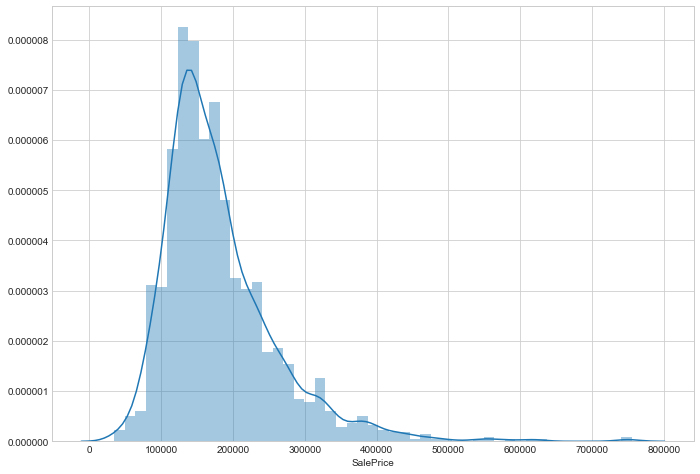

In [8]:
#Since SalePrice is a continuous variable, lets look at a historgram
#use Seaborn
sns.set_style("whitegrid")
plt.figure(figsize = (11.5,8))
sns.distplot(df_train["SalePrice"])

In [9]:
#skewness and kurtosis
print("Skewness: %f" % df_train["SalePrice"].skew())
print("Kurtosis: %f" % df_train["SalePrice"].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


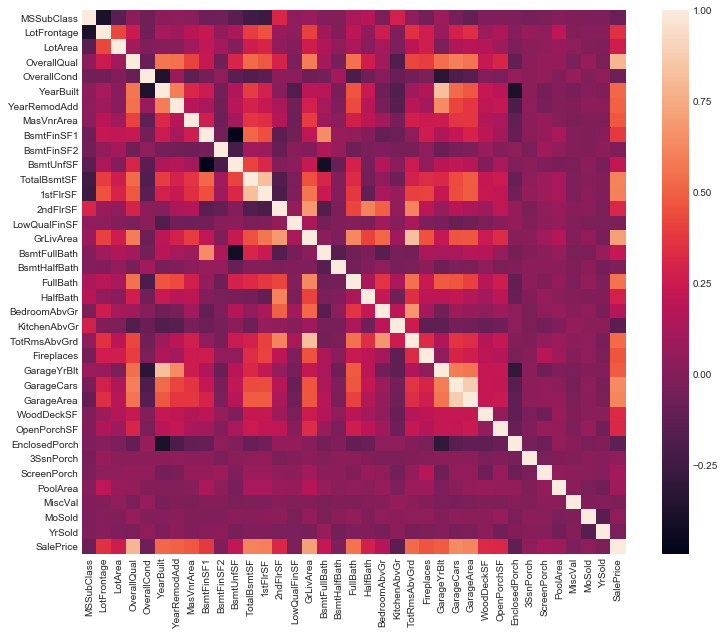

In [10]:
#look at correlation with other numerical variables
corr = df_train.drop(["Id"], axis = 1).corr()

plt.figure(figsize = (13,10))
sns.heatmap(corr, square = True)

Some notable quantitative varibles that are highly correlated with the response variable include: <br>
<i>*Note: multicollinearity might be problematic</i>

In [11]:
corr.abs().nlargest(10, "SalePrice")["SalePrice"]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

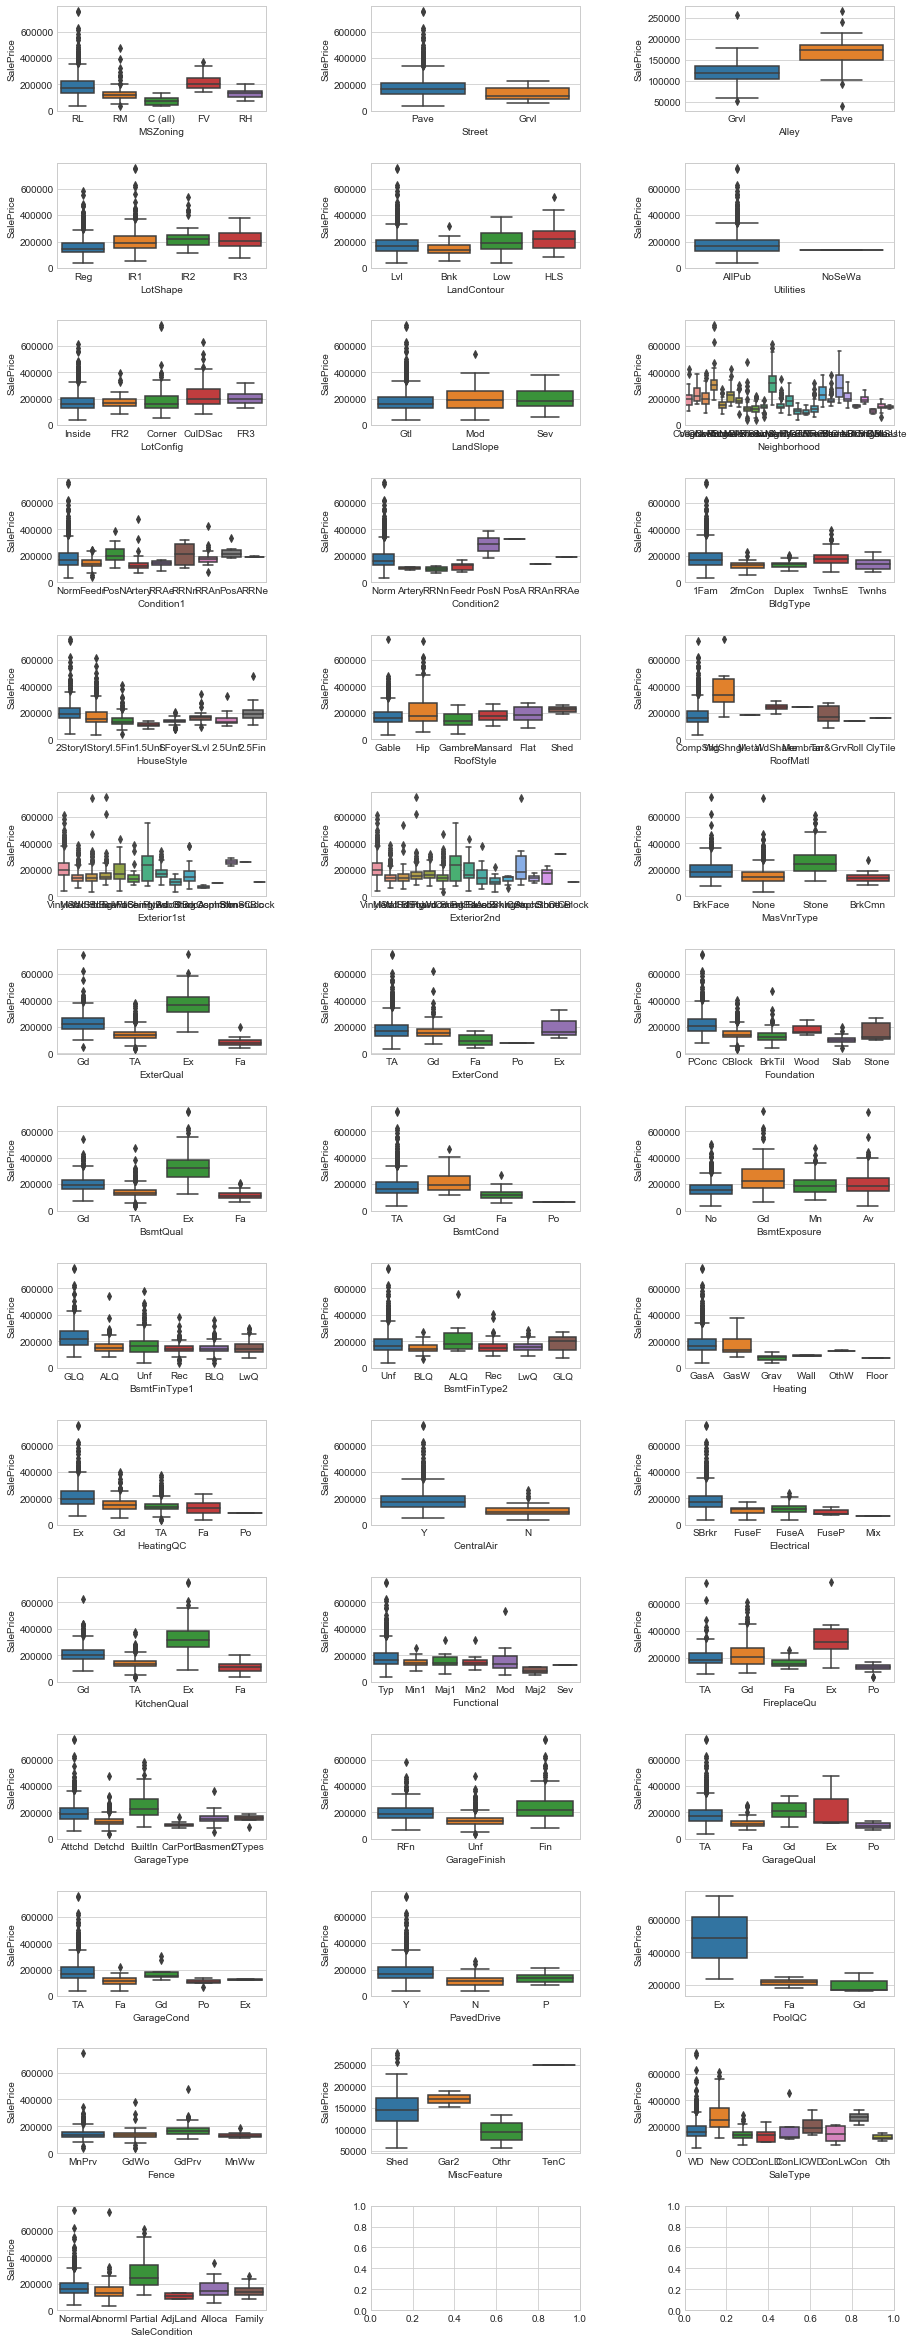

In [12]:
#Box plots for each categorical variable 
df_cat_rows = math.ceil(len(df_train.select_dtypes(include = ["O"]).columns)/3)
fig, ax = plt.subplots(figsize=(15,40), ncols=3, nrows=df_cat_rows)

left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .5     # the amount of width reserved for blank space between subplots
hspace =  .5    # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

#for ax, cat in zip(axs, df_cat):
#    sns.boxplot(x = cat, y = "SalePrice", data=df_train, dodge = False)
#in df_train.select_dtypes(include = ["O"]).columns:
#sns.boxplot(x = cat, y = "SalePrice", data=df_train, dodge = False)

cat_cols = df_train.select_dtypes(include = ["O"]).columns
i = 0
for r in range(df_cat_rows):
    for c in range(3):
        if i >= len(cat_cols): break
        sns.boxplot(x = cat_cols[i], y = "SalePrice", data=df_train,       ax=ax[r][c])
        i += 1


Notable categorical variables include (not ranked): 
<ol>
    Alley<br>
    Neighbourhood <br>
    RoofMatl (roof material)<br>
    ExterQual (exterior material quality)<br>
    BamtQual (height of basement)<br>
    CentralAir<br>
    etc...
</ol>
Need to consider encoding the categorical variables. But we should deal with any missing values first.

# Missing Data
Look at percentage of missing in each column.

In [13]:
missing_col = df_train.isnull().sum()
missing_col = missing_col/len(df_train) * 100
missing_col.sort_values(ascending = False)[missing_col > 0]

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

Based on the Data Description provided, some NA's are valid. For example, Alley = "NA" means no alley access. <br>
We are going to have to manually set these NA's to "NONE".

In [14]:
valid_NA = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
df_train[valid_NA] = df_train[valid_NA].fillna("NONE")

#still remains some columns that need imputation
df_train.loc[:, df_train.isnull().sum() > 0 ].isnull().sum().sort_values(ascending = False)

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
MasVnrType       8
Electrical       1
dtype: int64

In [15]:
#For GarageYrBlt. Allow missing values if there is indeed no garage.
garage_col = [col for col in df_train.columns if "Garage" in col]

[df_train[c][df_train["GarageYrBlt"].isnull()].value_counts() for c in garage_col]

[NONE    81
 Name: GarageType, dtype: int64,
 Series([], Name: GarageYrBlt, dtype: int64),
 NONE    81
 Name: GarageFinish, dtype: int64,
 0    81
 Name: GarageCars, dtype: int64,
 0    81
 Name: GarageArea, dtype: int64,
 NONE    81
 Name: GarageQual, dtype: int64,
 NONE    81
 Name: GarageCond, dtype: int64]

It seem that all cases where GarageYrBlt is missing, there is no actual garage. <br>
It doesn't make sense to try to impute these values. Instead we can either (1) set them to an invalid date or (2) keep them as missing. <br>
For now, we can keep them as missing values.

In [104]:
#encode all categorical variables
df_train2 = df_train.copy(deep=False)
cat_cols2 = df_train.select_dtypes(include = ["O"]).columns
for i in range(len(cat_cols2)):
    df_train2[cat_cols2[i]] = df_train[cat_cols2[i]].astype("category").cat.codes 

In [16]:
#Identify the type of missing variables
df_train.loc[:, df_train.isnull().any()].dtypes

LotFrontage    float64
MasVnrType      object
MasVnrArea     float64
Electrical      object
GarageYrBlt    float64
dtype: object

Of the remaining columns with missing variables, we have two numerical and two categorical.